#  Importing Modules

In [6]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
import numpy as np
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.multioutput import MultiOutputClassifier
from skmultilearn.problem_transform import BinaryRelevance
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, hamming_loss
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn.metrics import hamming_loss
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from lime.lime_text import LimeTextExplainer
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [7]:
stop_words = set(stopwords.words('english')) #Setting the language for nltk framework

# Importing Dataset

In [24]:
df = pd.read_csv(r"C:\Users\annaj\Downloads\Sexual Harrasment\train.csv")
test_df =pd.read_csv(r"C:\Users\annaj\Downloads\Sexual Harrasment\test.csv")


## Checking Redundancy 

In [9]:
def dup(dataframe):    
    """
        This function checks for redundancy in the dataset

        Parameters:
        dataframe : The dataset.

        Returns:
        tuple:  the row and the no.of data has been repeated.

    """
    df = dataframe[dataframe.duplicated()]
    return df,len(df)

# Checking in training set
train_duplicate,count = dup(df)
print('Number of duplicate rows',count)
print(train_duplicate)



Number of duplicate rows 428
                                            Description  Commenting  \
388   This survey is carried out by safecity (Red do...           1   
447                                  it was really bad.           1   
452                                  it was really bad.           1   
460                                          misbehaved           0   
537                                  it was really bad.           1   
...                                                 ...         ...   
7109                            Harassed in the evening           0   
7114                                         misbehaved           1   
7119                                         misbehaved           1   
7150                                happened in morning           1   
7175                                         misbehaved           1   

      Ogling/Facial Expressions/Staring  Touching /Groping  
388                                   1                  

In [10]:
#Checking in test set
test_duplicate,count = dup(test_df)
print('Number of duplicate rows',count)
print(test_duplicate)

Number of duplicate rows 61
                                            Description  Commenting  \
99          I was standing when a neighbour spanked me.           0   
150                                          harassment           1   
165                                   Touching, groping           0   
286                                  it was really bad.           1   
295                                          harassment           1   
...                                                 ...         ...   
1597                                         misbehaved           1   
1630                                         harassment           1   
1636  This survey is carried out by safecity (Red Do...           1   
1637                                 it was really bad.           1   
1663                                    chain snatching           0   

      Ogling/Facial Expressions/Staring  Touching /Groping  
99                                    0                  1

## Removing the redundant data

In [11]:
df.drop_duplicates(subset="Description",keep= False, inplace = True)
test_df.drop_duplicates(subset="Description",keep= False, inplace = True)

# Data Preprocessing

In [12]:
def preprocess_text(text):
    """
    Preprocesses the input text by performing the following steps:
    1. Removes special characters from the content.
    2. Converts the text to lowercase.
    3. Tokenizes the content.
    4. Removes stopwords.
    5. Joins the tokens back into a string.

    Parameters:
    text (str): The input text to be preprocessed.

    Returns:
    str: The preprocessed text after applying the specified transformations.
    """
    text = re.sub(r'[^\w\s]', '', text)
    text = text.lower()
    tokens = nltk.word_tokenize(text)
    filtered_tokens = [word for word in tokens if word not in stop_words]
    cleaned_text = ' '.join(filtered_tokens)
    return cleaned_text


In [13]:
# # Preprocess the 'Description' column in the training DataFrame (df)
# df['Description'] = df['Description'].apply(lambda x: preprocess_text(x))

# # Preprocess the 'Description' column in the testing DataFrame (test_df)
# test_df['Description'] = test_df['Description'].apply(lambda x: preprocess_text(x))

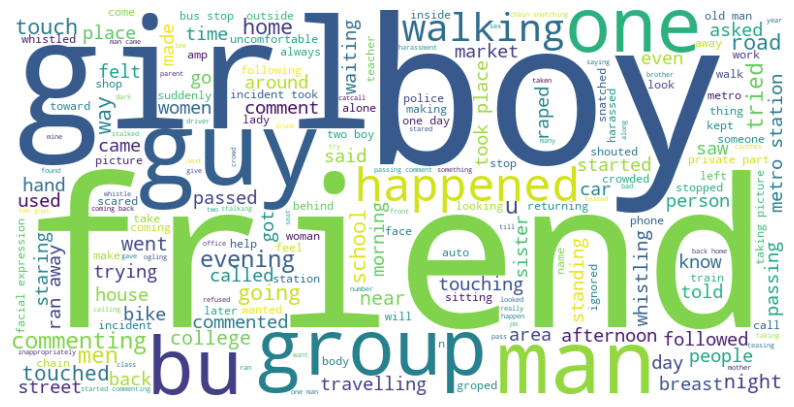

In [14]:
text_data = ' '.join(df['Description'].astype(str))

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [15]:

# creating a instance of TfidfVectorizer
vectorizer = TfidfVectorizer(ngram_range=(1,3),min_df=15,max_features=3000)


# seperating feature and labels from the dataset
x = df['Description']
y = df.drop("Description", axis='columns')
x_test = test_df['Description']
y_test = test_df.drop("Description", axis='columns')

# Vectorize the preprocessed text data
X = vectorizer.fit_transform(x)
X_test = vectorizer.transform(x_test)



# Training the models (finding the correct model)

# K-NN

In [16]:
knn_classifier = KNeighborsClassifier(n_neighbors=501)

# Fit the classifier to the training data
knn_classifier.fit(X,y)

ypred_knn = knn_classifier.predict(X_test)

# Calculate the ROC AUC score
score = roc_auc_score(ypred_knn, y_test)
print("ROC AUC Score:", score)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, ypred_knn)
print("Accuracy Score:", accuracy)

# Calculate the Hamming loss
hamming_loss_value_xg = hamming_loss(y_test, ypred_knn)
print("Hamming Loss:", hamming_loss_value_xg)


ROC AUC Score: 0.8423304257742287
Accuracy Score: 0.4578313253012048
Hamming Loss: 0.23589093214965123


# XGBoost

In [17]:
# Initialize the XGBoost classifier with a random state and enable categorical features
model = XGBClassifier(random_state=84, enable_categorical=True)

# Train the model on the training data
model.fit(X, y)

# Predict labels for the test data
ypred_xg = model.predict(X_test)

# Calculate the ROC AUC score
score = roc_auc_score(ypred_xg, y_test)
print("ROC AUC Score:", score)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, ypred_xg)
print("Accuracy Score:", accuracy)

# Calculate the Hamming loss
hamming_loss_value_xg = hamming_loss(y_test, ypred_xg)
print("Hamming Loss:", hamming_loss_value_xg)


ROC AUC Score: 0.827773670240127
Accuracy Score: 0.6195307545973368
Hamming Loss: 0.16423589093214966


# Random Forest

In [18]:

# Initialize ensemble classifiers
random_forest = RandomForestClassifier(n_estimators=100)

# Train ensemble classifiers
random_forest.fit(X, y)
y_pred_rf = random_forest.predict(X_test)

# Calculate the ROC AUC score
score = roc_auc_score(y_pred_rf, y_test)
print("ROC AUC Score:", score)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred_rf)
print("Accuracy Score:", accuracy)

# Calculate the Hamming loss
hamming_loss_rf = hamming_loss(y_test, y_pred_rf)
print("Hamming Loss:", hamming_loss_rf)


ROC AUC Score: 0.8228420312203606
Accuracy Score: 0.5967025998731769
Hamming Loss: 0.1752272246882266


### making a pipeline to combine the vectorizer and the model

In [19]:

pipe_rf = make_pipeline(
    vectorizer,  # You can adjust the parameters as needed
    random_forest  # You can adjust the parameters as needed
)

print(pipe_rf.predict_proba([test_df['Description'][40]]))

[array([[0.32, 0.68]]), array([[0.32, 0.68]]), array([[0.96, 0.04]])]


# Ensemble (OneVsRest & SVC)

In [20]:

model = OneVsRestClassifier(SVC())
model.fit(X, y)
y_pred = model.predict(X_test)

accuracy_ab = accuracy_score(y_test, y_pred)
hamming_loss_ab = hamming_loss(y_test, y_pred)

print("SVC- Accuracy:", accuracy_ab, "Hamming Loss:", hamming_loss_ab)

SVC- Accuracy: 0.6176284083703234 Hamming Loss: 0.16677235256816741


In [21]:
pipe_En = make_pipeline(
    vectorizer,  
    model  
)


# XAI

In [22]:
# Define class names based on your model's output
class_names = ['Commenting', 'Staring', 'Touching']

instanceNum = 570 # The sentence in the test database number.

In [23]:
i = 0
explainer = LimeTextExplainer(class_names=["not"+class_names[0],class_names[0]])

def predict_proba(text_instances):
    return (pipe_rf.predict_proba(text_instances)[i])

explanation = explainer.explain_instance(test_df['Description'][instanceNum], predict_proba,num_features=520)
i+=1

In [25]:
test_df['Description'][instanceNum]

'This incident happened with one of my friends, near the railway line of Chanakyapuri, one man came and was continuously commenting and stalking.'

In [21]:
explanation.as_list()

[('commenting', 0.5536170737046827),
 ('man', -0.051692552182910495),
 ('and', 0.04614941515855457),
 ('continuously', -0.03729851726169214),
 ('one', -0.0265119006005537),
 ('my', -0.02330423533377413),
 ('happened', 0.019281096511694157),
 ('was', 0.018174305465773227),
 ('railway', 0.016682538447614432),
 ('of', -0.013795989834757313),
 ('This', 0.010017240727544863),
 ('came', 0.009088099762439187),
 ('the', -0.008176848653120435),
 ('near', 0.00733440514894669),
 ('friends', 0.004884591003873309),
 ('with', 0.004653978476568595),
 ('line', 0.002004261986384374),
 ('incident', -0.0018232202722947397),
 ('stalking', 0.0010025292876677935),
 ('Chanakyapuri', 0.00011259628908796532)]

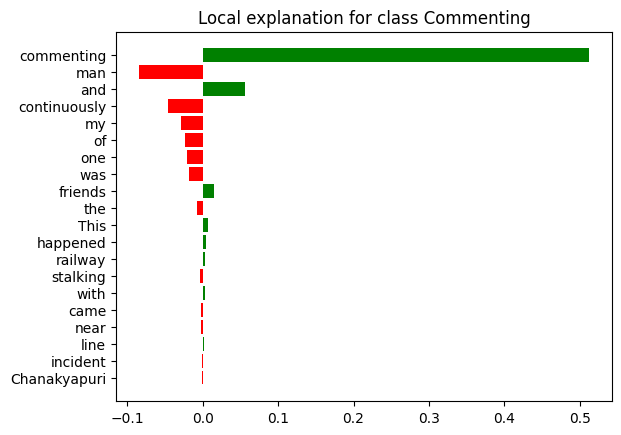

In [26]:
f =explanation.as_pyplot_figure()

In [27]:
explanation.show_in_notebook(text=True)

In [28]:
# Initialize the LimeTextExplainer with the class names
explainer = LimeTextExplainer(class_names=["not"+class_names[i],class_names[i]])


In [29]:
explanation= explainer.explain_instance(test_df['Description'][instanceNum], predict_proba,num_features=520)
i+=1

In [30]:
explanation.as_list()

[(np.str_('continuously'), 0.06844544041818772),
 (np.str_('commenting'), 0.03281308481115218),
 (np.str_('near'), 0.022799285273803465),
 (np.str_('and'), 0.021584609734941845),
 (np.str_('my'), -0.019397991455715333),
 (np.str_('man'), -0.017907509032048415),
 (np.str_('was'), -0.009856237827160552),
 (np.str_('one'), 0.009741603691932934),
 (np.str_('railway'), -0.007492598053830795),
 (np.str_('This'), 0.007094239436381767),
 (np.str_('line'), 0.0065451602091533044),
 (np.str_('of'), 0.004773073905855191),
 (np.str_('happened'), 0.004357976566571219),
 (np.str_('friends'), 0.0034364437884658585),
 (np.str_('incident'), 0.0030119003873400035),
 (np.str_('the'), 0.002928903118026214),
 (np.str_('stalking'), 0.001980520943226706),
 (np.str_('Chanakyapuri'), -0.0012577691622020402),
 (np.str_('with'), -0.0009593369581357562),
 (np.str_('came'), -0.000150780031656305)]

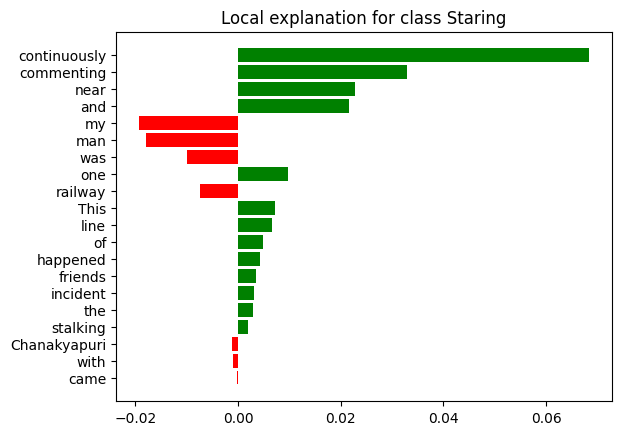

In [31]:
f =explanation.as_pyplot_figure()

In [28]:
explanation.show_in_notebook(text=True)

In [29]:
explainer = LimeTextExplainer(class_names=["not"+class_names[i],class_names[i]])


In [30]:
explanation = explainer.explain_instance(test_df['Description'][instanceNum], predict_proba,num_features=520)


In [31]:
explanation.as_list()

[('commenting', -0.09716249811169343),
 ('man', 0.037927074210891164),
 ('one', 0.01930119101008051),
 ('and', -0.017512968500532054),
 ('came', 0.015993418113969548),
 ('was', -0.014806999125586945),
 ('my', 0.01180787189620301),
 ('the', -0.009581804406773062),
 ('near', -0.008117598919572463),
 ('continuously', -0.00808327520512789),
 ('with', -0.007449976226855808),
 ('incident', 0.007268027077288078),
 ('of', 0.0060109274893717516),
 ('railway', 0.0043316102494383515),
 ('stalking', -0.004296213095153746),
 ('line', 0.003040262166470296),
 ('This', 0.002481297899330446),
 ('Chanakyapuri', 0.0020647158102606467),
 ('friends', 0.0005559649313056969),
 ('happened', 0.0004171022404754444)]

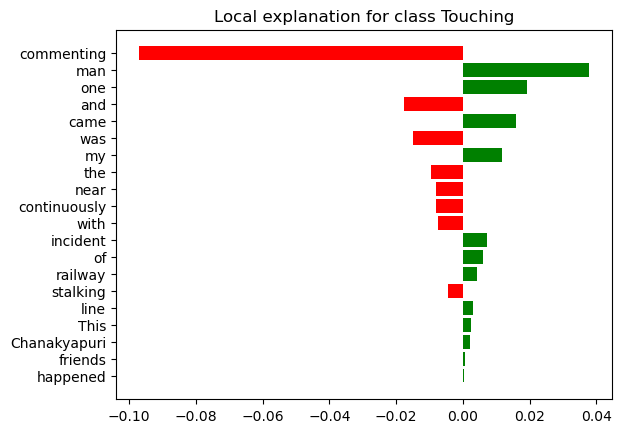

In [32]:
f =explanation.as_pyplot_figure()

In [33]:
explanation.show_in_notebook(text=True)